<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/RNN_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network
Numpy implementation of binary addition in RNN. 
Code from https://github.com/revsic/numpy-rnn/blob/master/RNN_numpy.ipynb 
This code is in turn based on [iamtrask's github.io](https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/).

The network is trained to add two binary numbers 

Input: binary a and b in the form of a vector of bins, ex. [1 1 1 1 0 1 1 0]

Output: binary c - predicted result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Generation

Generate the binary array less than 256.

In [2]:
BIN_DIM = 8
INPUT_DIM = 2
HIDDEN_DIM = 16
OUTPUT_DIM = 1

ALPHA = 0.1
ITER_NUM = 10000
LOG_ITER = ITER_NUM // 10
PLOT_ITER = ITER_NUM // 200

In [3]:
largest = pow(2, BIN_DIM)
decimal = np.array([range(largest)]).astype(np.uint8).T
binary = np.unpackbits(decimal, axis=1)

## Prepare weights and deltas
Prepare weight and delta values to use in the optimization process.

In [4]:
# weight values
w0 = np.random.normal(0, 1, [INPUT_DIM, HIDDEN_DIM])
w1 = np.random.normal(0, 1, [HIDDEN_DIM, OUTPUT_DIM])
wh = np.random.normal(0, 2, [HIDDEN_DIM, HIDDEN_DIM])

In [5]:
# delta values
d0 = np.zeros_like(w0)
d1 = np.zeros_like(w1)
dh = np.zeros_like(wh)

In [6]:
errs = list()
accs = list()

error = 0
accuracy = 0

## Training
Training binary addition in RNN with Backpropagation Through Time.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(out):
    return out * (1 - out)

def bin2dec(b):
    out = 0
    for i, x in enumerate(b[::-1]):
        out += x * pow(2, i)
    
    return out

In [8]:
for i in range(ITER_NUM + 1):
    # a + b = c
    a_dec = np.random.randint(largest / 2)
    b_dec = np.random.randint(largest / 2)
    c_dec = a_dec + b_dec
    
    a_bin = binary[a_dec]
    b_bin = binary[b_dec]
    c_bin = binary[c_dec]
    
    pred = np.zeros_like(c_bin)
    
    overall_err = 0 # total error in the whole calculation process.
    
    output_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(HIDDEN_DIM))
    
    future_delta = np.zeros(HIDDEN_DIM)
    
    # forward propagation
    for pos in range(BIN_DIM)[::-1]:
        X = np.array([[a_bin[pos], b_bin[pos]]]) # shape=(1, 2)
        Y = np.array([[c_bin[pos]]]) # shape=(1, 1)
        
        hidden = sigmoid(np.dot(X, w0) + np.dot(hidden_values[-1], wh))
        output = sigmoid(np.dot(hidden, w1))
        
        pred[pos] = np.round(output[0][0])
        
        # squared mean error
        output_err = Y - output
        output_deltas.append(output_err * deriv_sigmoid(output))
        hidden_values.append(hidden)
        
        overall_err += np.abs(output_err[0])
    
    # backpropagation through time
    for pos in range(BIN_DIM):
        X = np.array([[a_bin[pos], b_bin[pos]]])
        
        hidden = hidden_values[-(pos + 1)]
        prev_hidden = hidden_values[-(pos + 2)]
        
        output_delta = output_deltas[-(pos + 1)]
        hidden_delta = (np.dot(future_delta, wh.T) + np.dot(output_delta, w1.T)) * deriv_sigmoid(hidden)
        
        d1 += np.dot(np.atleast_2d(hidden).T, output_delta)
        dh += np.dot(np.atleast_2d(prev_hidden).T, hidden_delta)
        d0 += np.dot(X.T, hidden_delta)

        future_delta = hidden_delta 
    
    w1 += ALPHA * d1
    w0 += ALPHA * d0
    wh += ALPHA * dh
    
    d1 *= 0
    d0 *= 0
    dh *= 0
    
    error += overall_err
    if (bin2dec(pred) == c_dec):
        accuracy += 1
        
    if (i % PLOT_ITER == 0):
        errs.append(error / PLOT_ITER)
        accs.append(accuracy / PLOT_ITER)
        
        error = 0
        accuracy = 0
    
    if (i % LOG_ITER == 0):
        print('Iter', i)
        print("Error :", overall_err)
        print("Pred :", pred)
        print("True :", c_bin)
        print(a_dec, "+", b_dec, "=", bin2dec(pred))
        print('----------')

Iter 0
Error : [4.32476932]
Pred : [1 1 1 1 1 0 1 0]
True : [1 0 0 1 1 0 1 1]
62 + 93 = 250
----------
Iter 1000
Error : [3.79835296]
Pred : [1 1 1 1 1 1 1 1]
True : [1 1 1 0 1 0 0 1]
115 + 118 = 255
----------
Iter 2000
Error : [3.75233483]
Pred : [1 0 0 0 0 0 0 0]
True : [1 0 1 0 0 1 0 0]
82 + 82 = 128
----------
Iter 3000
Error : [4.31898949]
Pred : [0 1 0 1 1 1 1 1]
True : [0 1 1 0 0 0 0 0]
85 + 11 = 95
----------
Iter 4000
Error : [3.11373723]
Pred : [0 1 0 0 0 0 0 1]
True : [0 1 0 1 0 1 0 1]
23 + 62 = 65
----------
Iter 5000
Error : [2.56528033]
Pred : [1 0 0 0 0 0 0 0]
True : [1 0 1 1 0 0 0 0]
116 + 60 = 128
----------
Iter 6000
Error : [1.56371918]
Pred : [0 1 0 1 0 0 0 1]
True : [0 1 0 1 0 0 0 1]
52 + 29 = 81
----------
Iter 7000
Error : [0.58668388]
Pred : [1 0 1 0 1 0 0 0]
True : [1 0 1 0 1 0 0 0]
88 + 80 = 168
----------
Iter 8000
Error : [0.94169139]
Pred : [1 0 1 0 1 1 0 0]
True : [1 0 1 0 1 1 0 0]
77 + 95 = 172
----------
Iter 9000
Error : [0.53757416]
Pred : [0 0 0 1 0 

## Plot learning curve
Plot error and accuracy.

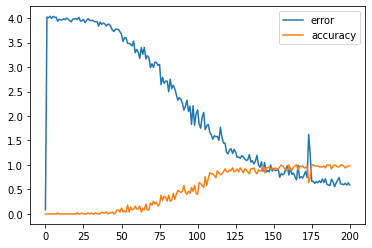

In [9]:
plt.plot(errs, label='error')
plt.plot(accs, label='accuracy')
plt.legend()

Test the network

In [10]:
TEST_ITER_NUM = 10000

n_yes = 0
n_no  = 0

for i in range(TEST_ITER_NUM + 1):
    # a + b = c
    # generate test data

    a_dec = np.random.randint(largest / 2)
    b_dec = np.random.randint(largest / 2)
    c_dec = a_dec + b_dec
    
    a_bin = binary[a_dec]
    b_bin = binary[b_dec]
    c_bin = binary[c_dec]
    
    pred = np.zeros_like(c_bin)
    
    overall_err = 0 # total error in the whole calculation process.
    
    output_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(HIDDEN_DIM))
    
    future_delta = np.zeros(HIDDEN_DIM)
    

    # forward propagation
    for pos in range(BIN_DIM)[::-1]:
        X = np.array([[a_bin[pos], b_bin[pos]]]) # shape=(1, 2)
        Y = np.array([[c_bin[pos]]]) # shape=(1, 1)
        
        hidden = sigmoid(np.dot(X, w0) + np.dot(hidden_values[-1], wh))
        output = sigmoid(np.dot(hidden, w1))
        
        pred[pos] = np.round(output[0][0])

        # squared mean error
        output_err = Y - output
        output_deltas.append(output_err * deriv_sigmoid(output))
        hidden_values.append(hidden)
        
        overall_err += np.abs(output_err[0])        



    # accuracy
    if (bin2dec(pred) == c_dec): 
      n_yes += 1
    else:
      n_no  += 1
    
    if i<30:
      print('Iter', i)
      print("Error :", overall_err)
      print("Pred :", pred)
      print("True :", c_bin)
      print(a_dec, "+", b_dec, "=", bin2dec(pred))
      print('----------')

# calculate accuracy
acc = float(n_yes)/float(n_yes+n_no)

print(" ")
print(" ")
print(" ")
print("---------------------------------------------------")
print(" ")
print("RNN accuracy = ",acc)
print(" ")
print(" ")

Iter 0
Error : [0.40032932]
Pred : [1 0 1 1 1 1 1 1]
True : [1 0 1 1 1 1 1 1]
121 + 70 = 191
----------
Iter 1
Error : [0.77139251]
Pred : [0 1 0 0 1 0 1 1]
True : [0 1 0 0 1 0 1 1]
56 + 19 = 75
----------
Iter 2
Error : [0.74520805]
Pred : [0 1 1 0 1 1 0 0]
True : [0 1 1 0 1 1 0 0]
61 + 47 = 108
----------
Iter 3
Error : [0.36199184]
Pred : [0 1 1 0 1 1 1 0]
True : [0 1 1 0 1 1 1 0]
89 + 21 = 110
----------
Iter 4
Error : [0.60429172]
Pred : [1 1 0 0 0 1 1 1]
True : [1 1 0 0 0 1 1 1]
109 + 90 = 199
----------
Iter 5
Error : [1.27517745]
Pred : [0 0 1 0 1 1 1 1]
True : [0 0 1 0 1 0 1 1]
4 + 39 = 47
----------
Iter 6
Error : [0.51147943]
Pred : [1 0 1 0 0 1 1 1]
True : [1 0 1 0 0 1 1 1]
71 + 96 = 167
----------
Iter 7
Error : [0.50790345]
Pred : [0 1 1 0 0 1 1 0]
True : [0 1 1 0 0 1 1 0]
11 + 91 = 102
----------
Iter 8
Error : [1.06246204]
Pred : [0 1 1 1 1 0 0 1]
True : [0 1 1 1 1 0 0 1]
74 + 47 = 121
----------
Iter 9
Error : [0.51531325]
Pred : [0 1 1 0 1 1 0 0]
True : [0 1 1 0 1 1 0

# **Now training using keras**

In [11]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense,SimpleRNN
import numpy as np
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# training dataset generation                            
int2binary = {}                                    #Use to convert the input integer to a computer-operable binary number
binary_dim = 8                                     #defined the length of the binary number = 8

largest_number = pow(2,binary_dim)                         #  The maximum number that can be taken is =256 
binary = np.unpackbits(
    np.array([range(largest_number)],dtype=np.uint8).T,axis=1)            
for i in range(largest_number):                                # one-one correspondence between binary numbers and decimal numbers
    int2binary[i] = binary[i]

x_train = []  
y_train = []  
for j in range(1000):          #Model iteration times, you can change it yourself
    # generate a simple addition problem (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version #constrained initialization input addenda a value does not exceed 128
    a = list(int2binary[a_int]) # binary encoding # Convert the addend a to the corresponding binary number
    a.reverse()

    b_int = np.random.randint(largest_number/2) # int version
    b = list(int2binary[b_int]) # binary encoding
    b.reverse()

    c_int = a_int + b_int    # 
    c = list(int2binary[c_int])
    c.reverse()  



    tempx = np.hstack((np.array([a]).T,np.array([b]).T))

    tempx = np.array(tempx.reshape(8,2))
    tempy = np.array([c]).reshape((8,1))

    x_train.append(tempx)
    y_train.append(tempy)
     
    
    

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=0)
print(x_train.shape)  
print(y_train.shape)

print("Example training data:")
print(np.flipud(x_train[0,:,0])," + ",np.flipud(x_train[0,:,1])," = ",np.flipud(y_train[0,:,0]))
print(np.flipud(x_train[1,:,0])," + ",np.flipud(x_train[1,:,1])," = ",np.flipud(y_train[1,:,0]))
print(np.flipud(x_train[2,:,0])," + ",np.flipud(x_train[2,:,1])," = ",np.flipud(y_train[2,:,0]))



(700, 8, 2)
(700, 8, 1)
Example training data:
[0 1 0 0 0 1 0 0]  +  [0 0 0 0 1 1 0 1]  =  [0 1 0 1 0 0 0 1]
[0 0 1 1 0 0 1 1]  +  [0 1 1 0 0 1 0 0]  =  [1 0 0 1 0 1 1 1]
[0 0 0 1 0 1 1 1]  +  [0 1 0 1 0 1 1 1]  =  [0 1 1 0 1 1 1 0]


# **Define model**

In [12]:

model = Sequential()
model.add(SimpleRNN(128, input_shape=(8, 2),return_sequences=True,activation="sigmoid"))
model.add(TimeDistributed(Dense(1)))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8, 128)            16768     
_________________________________________________________________
time_distributed (TimeDistri (None, 8, 1)              129       
_________________________________________________________________
activation (Activation)      (None, 8, 1)              0         
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


# **Train the RNN**

In [13]:
history = model.fit(x_train, y_train, 32, 300,validation_data=(x_val, y_val)) 


Epoch 1/300
22/22 [==============================] - 2s 28ms/step - loss: 0.7144 - accuracy: 0.5053 - val_loss: 0.6953 - val_accuracy: 0.5017
Epoch 2/300
22/22 [==============================] - 0s 12ms/step - loss: 0.6921 - accuracy: 0.5094 - val_loss: 0.6939 - val_accuracy: 0.4967
Epoch 3/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5137 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 4/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5151 - val_loss: 0.6921 - val_accuracy: 0.5458
Epoch 5/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5145 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 6/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5217 - val_loss: 0.6912 - val_accuracy: 0.5517
Epoch 7/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.5476 - val_loss: 0.6938 - val_accuracy: 0.4967
Epoch 8/300

# **Draw loss and accuracy**

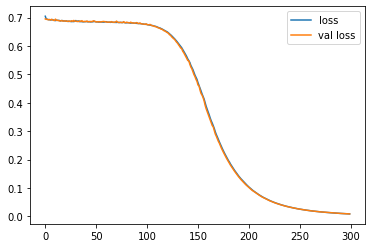

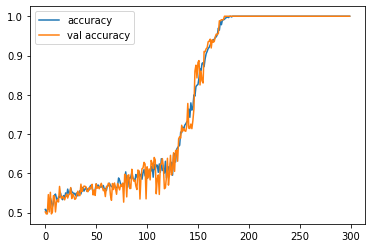

Validation accuracy =  1.0
Validation loss     =  0.008953222073614597


In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# calculate validation accuracy
loss, acc = model.evaluate(x_val, y_val, verbose=0)
print("Validation accuracy = ", acc)
print("Validation loss     = ", loss)

# **Calculate accuracy**

In [15]:
y_pred = np.round(model.predict(x_val)).astype(int)

for i in range(10):
  print("   ",np.flipud(x_val[i,:,0]))
  print(" + ",np.flipud(x_val[i,:,1]))
  print("--------------------------------")
  print("pred ",np.flipud(y_pred[i,:,0]))
  print("true ",np.flipud(y_val[i,:,0]))
  print("  ")

    [0 0 1 1 0 0 0 0]
 +  [0 0 0 1 0 0 0 1]
--------------------------------
pred  [0 1 0 0 0 0 0 1]
true  [0 1 0 0 0 0 0 1]
  
    [0 1 0 0 1 0 1 1]
 +  [0 0 0 0 1 1 1 1]
--------------------------------
pred  [0 1 0 1 1 0 1 0]
true  [0 1 0 1 1 0 1 0]
  
    [0 1 1 1 1 0 0 1]
 +  [0 1 1 0 0 1 0 1]
--------------------------------
pred  [1 1 0 1 1 1 1 0]
true  [1 1 0 1 1 1 1 0]
  
    [0 0 0 0 1 0 1 1]
 +  [0 0 0 0 1 0 1 1]
--------------------------------
pred  [0 0 0 1 0 1 1 0]
true  [0 0 0 1 0 1 1 0]
  
    [0 1 0 1 0 0 0 1]
 +  [0 1 1 1 1 0 1 1]
--------------------------------
pred  [1 1 0 0 1 1 0 0]
true  [1 1 0 0 1 1 0 0]
  
    [0 1 1 0 0 1 1 0]
 +  [0 0 0 0 1 0 0 0]
--------------------------------
pred  [0 1 1 0 1 1 1 0]
true  [0 1 1 0 1 1 1 0]
  
    [0 1 0 1 0 0 1 1]
 +  [0 1 1 1 0 1 0 1]
--------------------------------
pred  [1 1 0 0 1 0 0 0]
true  [1 1 0 0 1 0 0 0]
  
    [0 0 1 1 0 1 0 0]
 +  [0 1 0 0 0 0 1 1]
--------------------------------
pred  [0 1 1 1 0 1 1 1]
tru